In [1]:
import kagglehub
import os
import numpy as np
from kagglehub import KaggleDatasetAdapter
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

file_path = os.path.join(path, "diabetes.csv")
# Load the latest version
loaded_data=np.loadtxt(file_path,delimiter=',',skiprows=1)

x_train_np=loaded_data[:,0:-1]
y_train_np=loaded_data[:,[-1]]

print('loaded_data.shape=',loaded_data.shape)
print('x_train_np.shape=',x_train_np.shape)
print('y_train_np.shape=',y_train_np.shape)

Path to dataset files: C:\Users\ANNA_TEST\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1
loaded_data.shape= (768, 9)
x_train_np.shape= (768, 8)
y_train_np.shape= (768, 1)


In [2]:
import torch
from torch import nn

x_train=torch.Tensor(x_train_np)
y_train=torch.Tensor(y_train_np)

C:\Users\ANNA_TEST\anaconda3\Lib\site-packages\torch\cuda\__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [3]:
class MyLogisticRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.logistic_stack=nn.Sequential(
            nn.Linear(8,1)
        )

    def forward(self,data):
        pred=self.logistic_stack(data)
        return pred

In [4]:
model=MyLogisticRegressionModel()

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.3346, -0.3377, -0.1371, -0.3260, -0.0226,  0.0875,  0.0862, -0.2088]],
       requires_grad=True)
Parameter containing:
tensor([0.1362], requires_grad=True)


In [5]:
loss_function = nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
train_loss_list=[]
train_accuracy_list=[]

nums_epoch=10000

for epoch in range(nums_epoch+1):
    outputs=model(x_train)
    loss=loss_function(outputs,y_train)

    train_loss_list.append(loss.item())

    pred=outputs>0.5
    correct=(pred.float()==y_train)
    accuracy=correct.sum().item()/len(correct)

    train_accuracy_list.append(accuracy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch %100==0:
        print('epoch=',epoch,'current loss=',loss.item(),'accuracy=',accuracy)
    

epoch= 0 current loss= 25.479949951171875 accuracy= 0.6510416666666666
epoch= 100 current loss= 11.1170654296875 accuracy= 0.65234375
epoch= 200 current loss= 4.098697662353516 accuracy= 0.5963541666666666
epoch= 300 current loss= 2.0428779125213623 accuracy= 0.5143229166666666
epoch= 400 current loss= 1.6413702964782715 accuracy= 0.5078125
epoch= 500 current loss= 1.3478883504867554 accuracy= 0.5455729166666666
epoch= 600 current loss= 1.1052881479263306 accuracy= 0.5690104166666666
epoch= 700 current loss= 0.9243209362030029 accuracy= 0.59375
epoch= 800 current loss= 0.8017116189002991 accuracy= 0.6184895833333334
epoch= 900 current loss= 0.7268779277801514 accuracy= 0.6432291666666666
epoch= 1000 current loss= 0.6829774975776672 accuracy= 0.65625
epoch= 1100 current loss= 0.6556801199913025 accuracy= 0.6666666666666666
epoch= 1200 current loss= 0.6373072862625122 accuracy= 0.6705729166666666
epoch= 1300 current loss= 0.6244373917579651 accuracy= 0.67578125
epoch= 1400 current loss= 

In [7]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 1.1794e-01,  2.9079e-02, -1.6496e-02,  6.6647e-04, -7.0915e-04,
          6.2594e-02,  7.4654e-01,  7.9453e-03]], requires_grad=True)
Parameter containing:
tensor([-6.1581], requires_grad=True)


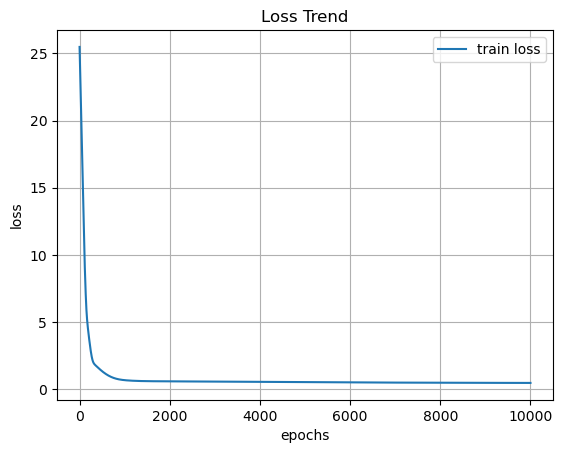

In [8]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_loss_list, label="train loss")
plt.legend(loc='best')

plt.show()

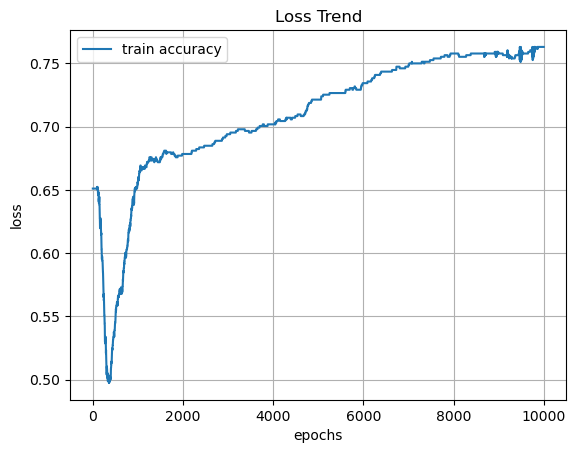

In [9]:
plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_accuracy_list, label="train accuracy")
plt.legend(loc='best')

plt.show()